<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef


In [90]:
pip install openpyxl==3.0.9

In [91]:
def cost_function(X,y,w,lamb, l2 = True): ###define cost function
  hypothesis = np.dot(X,w.T) ###calculation of hypothesis for all instances
  
  if l2:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) ####as mention
  else:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) +(lamb/2)*np.sum(np.abs(w)) ####as mention in the class notes
  return J

In [92]:
def batch_gradient_descent(X, y, w, alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X, w.T)
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/len(y))*np.dot(hypothesis - y, X)
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/len(y))*np.dot(hypothesis - y, X)
    cost_history[i] = cost_function(X, y, w, lamb)
  return w, cost_history

In [93]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [94]:
def stochastic_gradient_descent(X,y,w,alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    if l2:
      w = w*(1 - alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [95]:
data_x_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xtr.csv',header=None)
data_y_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/ytr.csv',header=None)
data_x_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xte.csv',header=None)
data_y_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/yte.csv',header=None)
print(data_y_te)

      0
0  1.36
1  1.36
2  1.36
3  1.36
4  1.36
5  1.43
6  1.43
7  1.43
8  1.43
9  1.43


In [96]:
#datan = data.values
X = data_x_tr.values[:, [0, 1]]
m = X.shape[0]
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
print(X)

[[0.51322751 0.0729927 ]
 [0.51322751 0.74452555]
 [0.51322751 0.62043796]
 [0.51322751 0.        ]
 [0.51322751 0.6350365 ]
 [0.51322751 0.02919708]
 [0.51322751 0.57664234]
 [0.51322751 0.64233577]
 [0.51322751 0.11678832]
 [0.51322751 0.64963504]
 [0.51322751 0.62043796]
 [0.74603175 0.80291971]
 [0.97883598 0.43065693]
 [0.25396825 0.24817518]
 [0.02116402 0.62773723]
 [0.51322751 0.81021898]
 [0.74603175 1.        ]
 [0.97354497 0.44525547]
 [0.02116402 0.25547445]
 [0.50793651 0.64233577]
 [0.73544974 0.82481752]
 [0.97354497 1.        ]
 [0.26984127 0.45985401]
 [0.02116402 0.28467153]
 [0.51322751 0.6350365 ]
 [0.73015873 0.81021898]
 [0.96296296 1.        ]
 [0.25925926 0.45255474]
 [0.02116402 0.27007299]
 [0.51322751 0.61313869]
 [0.75661376 0.80291971]
 [0.98941799 0.98175182]
 [0.25925926 0.43065693]
 [0.         0.25182482]
 [0.51322751 0.61313869]
 [0.75132275 0.79927007]
 [0.97883598 0.97810219]
 [0.26984127 0.4379562 ]
 [0.01587302 0.25547445]
 [0.51322751 0.86131387]


In [97]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones

In [98]:
X.shape

(55, 3)

In [99]:
print(X)

[[1.         0.51322751 0.0729927 ]
 [1.         0.51322751 0.74452555]
 [1.         0.51322751 0.62043796]
 [1.         0.51322751 0.        ]
 [1.         0.51322751 0.6350365 ]
 [1.         0.51322751 0.02919708]
 [1.         0.51322751 0.57664234]
 [1.         0.51322751 0.64233577]
 [1.         0.51322751 0.11678832]
 [1.         0.51322751 0.64963504]
 [1.         0.51322751 0.62043796]
 [1.         0.74603175 0.80291971]
 [1.         0.97883598 0.43065693]
 [1.         0.25396825 0.24817518]
 [1.         0.02116402 0.62773723]
 [1.         0.51322751 0.81021898]
 [1.         0.74603175 1.        ]
 [1.         0.97354497 0.44525547]
 [1.         0.02116402 0.25547445]
 [1.         0.50793651 0.64233577]
 [1.         0.73544974 0.82481752]
 [1.         0.97354497 1.        ]
 [1.         0.26984127 0.45985401]
 [1.         0.02116402 0.28467153]
 [1.         0.51322751 0.6350365 ]
 [1.         0.73015873 0.81021898]
 [1.         0.96296296 1.        ]
 [1.         0.25925926 0.45

In [100]:
y=data_y_tr.values[:,0] #output
print(y.shape)
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin) #Normalization
print(y)

(55,)
[0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.         0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.21428571 0.21428571 0.42857143 0.42857143 0.42857143 0.42857143
 0.42857143 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.14285714
 0.14285714 0.14285714 0.14285714 0.14285714 0.42857143 0.42857143
 0.42857143 0.42857143 0.42857143 0.28571429 0.78571429 1.
 0.64285714 0.64285714 0.89285714 1.         1.         1.
 1.         1.         0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714]


In [101]:
y_te=data_y_te.values[:,0] #output
y_te = np.array([y_te]).T
print(y_te.shape)
y_te_min = np.min(y_te, axis = 0)
y_te_max = np.max(y_te, axis = 0)
y_te = (y_te- y_te_min)/(y_te_max-y_te_min) #Normalization
#y_te = y_te/y_te_max
print(y_te)

(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [102]:
w= np.zeros(X.shape[1])

In [103]:
print(w)

[0. 0. 0.]


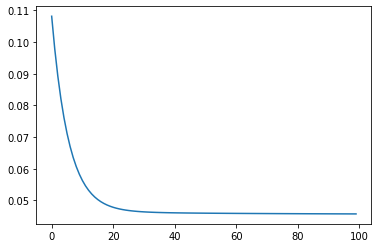

In [104]:
alpha=0.05 ##learning rate
iters=100 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his)
plt.show()

In [105]:
print(batch_w)

[0.25907272 0.07766922 0.12357418]


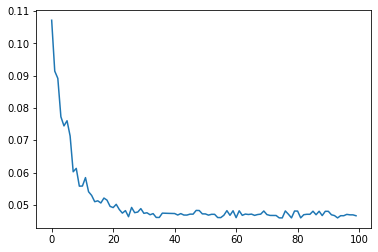

[0.24975023 0.08077447 0.12309894]


In [106]:
batch_size = 50
w= np.zeros(X.shape[1])
mb_w, J_his_mb = MB_gradient_descent(X, y, w, alpha, iters, batch_size, lamb)

plt.plot(range(iters),J_his_mb)
plt.show()

print(mb_w)

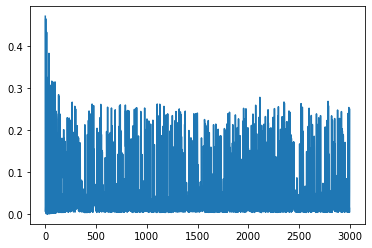

[0.27159798 0.05212732 0.12044252]


In [107]:
w= np.zeros(X.shape[1])
iters = 3000
alpha = 0.01
sg_w, J_his_sg = stochastic_gradient_descent(X,y,w,alpha, iters, lamb)

plt.plot(range(iters),J_his_sg)
plt.show()

print(sg_w)

In [108]:
X_test = data_x_te.values[:, [0, 1]]
m = X_test.shape[0]
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones
#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

y_batch_pred = np.dot(X_test, batch_w)
y_mb_pred = np.dot(X_test, mb_w)
y_sg_pred = np.dot(X_test, sg_w)

#print(y_batch_pred)

In [109]:
def meanSquareError(Y_pred, Y_test):
  mse = np.sum(np.square(Y_pred - Y_test).mean(axis = 0))
  return mse

In [110]:
def meanAbsoluteError(Y_pred, Y_test):
  mae = np.sum(np.abs(Y_pred - Y_test).mean(axis = 0))
  return mae

In [111]:
def CC(Y, _Y):
        diffY = Y - (np.mean(Y, axis=0) * np.ones(Y.shape))
        diff_Y = _Y - (np.mean(_Y, axis=0) * np.ones(_Y.shape))
        
        #print(diffY)
                
        num = np.dot(diffY.transpose(), diff_Y)
        deno = np.sqrt(np.dot(diffY.transpose(), diffY)[0])*np.sqrt(np.dot(diff_Y.transpose(), diff_Y)[0])
        return num/deno

In [112]:
print("Batch: MSE " + str(meanSquareError(y_batch_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_batch_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_batch_pred]).T)[0][0]))
print("MB: MSE " + str(meanSquareError(y_mb_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_mb_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_mb_pred]).T)[0][0]))
print("SG: MSE " + str(meanSquareError(y_sg_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_sg_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_sg_pred]).T)[0][0]))

Batch: MSE 0.27489462696092165 and MAE 0.5004957610083197 CC: -0.007001690406414636
MB: MSE 0.27732630369096944 and MAE 0.5005155817474787 CC: -0.0071885980537087675
SG: MSE 0.27401989426643913 and MAE 0.5003327275886138 CC: -0.005474238521643374


In [119]:
X_test = data_x_te.values[:, [0, 1]]
m = X_test.shape[0]
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones

#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

def make_pred(w):
  y_pred = np.dot(X_test, w)
  return y_pred
#print(y_batch_pred)

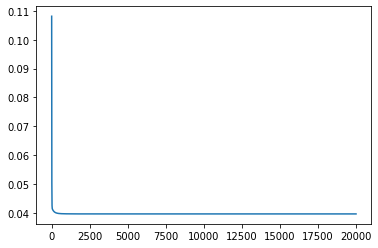

Batch: <function batch_gradient_descent at 0x7fe2cf6c38c0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


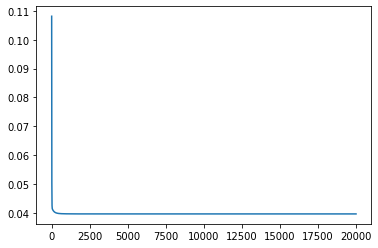

Batch: <function batch_gradient_descent at 0x7fe2cf6c38c0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


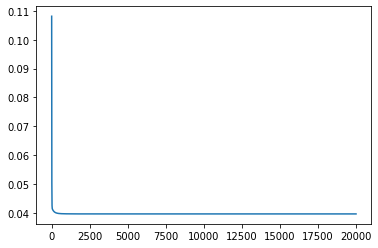

Batch: <function batch_gradient_descent at 0x7fe2cf6c38c0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


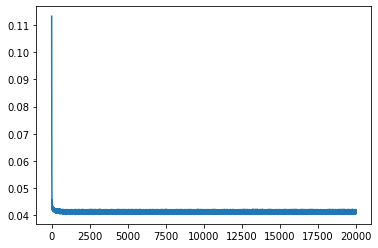

Batch: <function MB_gradient_descent at 0x7fe2cf5ce4d0> 0.26387705788804183 and MAE 0.4994541127972513 CC: 0.02096103574679628


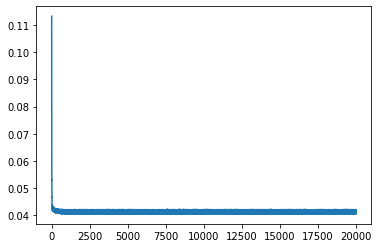

Batch: <function MB_gradient_descent at 0x7fe2cf5ce4d0> 0.2642967678248514 and MAE 0.4994456111524834 CC: 0.022230156875970984


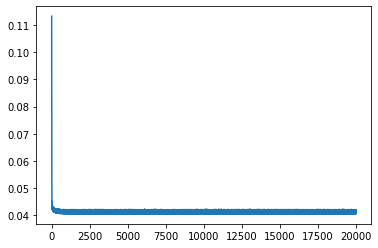

Batch: <function MB_gradient_descent at 0x7fe2cf5ce4d0> 0.26503189546395595 and MAE 0.49944138478435196 CC: 0.022871542296636984


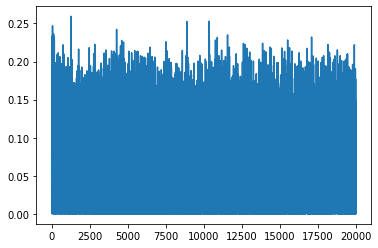

Batch: <function stochastic_gradient_descent at 0x7fe2d1d78a70> 0.26393228278368086 and MAE 0.4994767018869627 CC: 0.012004898470999156


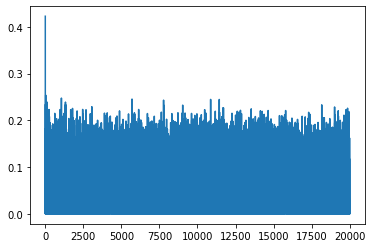

Batch: <function stochastic_gradient_descent at 0x7fe2d1d78a70> 0.25918779413406023 and MAE 0.49951220220094034 CC: 0.009277902801485325


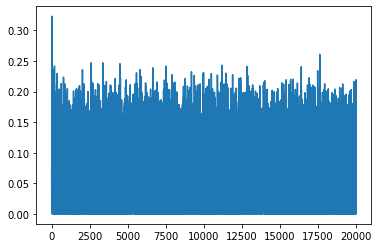

Batch: <function stochastic_gradient_descent at 0x7fe2d1d78a70> 0.26535876034964395 and MAE 0.499775053854005 CC: 0.003984879917998778


In [123]:
# checking for all combinations of both normals and algos

alpha=0.05 ## learning rate
iters=20000 ## iterations
lamb=0.1 ## regularisation param
batch_size = 50

# X,y,w,alpha, iters, batch_size, lamb, l2 = True

for k in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
  for j in range(3): # 3 kinds of regularisation
    if j == 0: ## no regularisation
      lamb = 0
      if k == MB_gradient_descent:
        calc_w,J_his = k(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb)
      else:
        calc_w,J_his = k(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(k) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    elif j == 1: ## l2 reg
      if k == MB_gradient_descent:
        calc_w,J_his = k(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = True)
      else:
        calc_w,J_his = k(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = True)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(k) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    else:
      if k == MB_gradient_descent:
        calc_w,J_his = k(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = False)
      else:
        calc_w,J_his = k(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = False)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(k) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
